# Airline Dataset Preprocessing

## TODO 

* [ ] Feature descriptions
* [x] Column types
* [x] Missing Data
* [x] Distribution
* [x] Correlations

## Import libraries

In [45]:
import os
import logging
from datetime import datetime
_ABSOLUTE_DIR = os.getcwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

from matplotlib.colors import BoundaryNorm, ListedColormap

## Load Data

In [46]:
dfAirline_train = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/train.csv', index_col=0)
dfAirline_test = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/test.csv', index_col=0)

In [47]:
dfAirline_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [48]:
dfAirline_test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [49]:
dfAirline_train_v1 = dfAirline_train.copy()
dfAirline_test_v1 = dfAirline_test.copy()

As we can see, the first column is unnecessary, because it only gives the data row number, and we already have that information. Because of that, the row called *Unnamed:0* was deleted.

## Missing data

In [50]:
dfAirline_train_v1.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [51]:
dfAirline_test_v1.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In this case, because the feature `Arrival Delay in Minutes` cannot be imputated by the mean or KNN, our decision was to drop these rows.

In [52]:
dfAirline_test_v1 = dfAirline_test_v1.dropna()
dfAirline_train_v1 = dfAirline_train_v1.dropna()

In [53]:
dfAirline_test_v1.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Column types

In [54]:
dfAirline_train_v1.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Most features have numeric values and do not need any data transformation. Otherwise, there are 5 categorical features (Gender, Customer Type, Type of Travel, Class and satisfaction) that need to be transformed into variables with boolean or numeric values.

### Gender

In [55]:
dfAirline_train_v1.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [56]:
dfAirline_train_v1['Gender'] = dfAirline_train_v1['Gender'].map({'Female':True, 'Male':False})

In [57]:
dfAirline_test_v1['Gender'] = dfAirline_test_v1['Gender'].map({'Female':True, 'Male':False})

### Customer Type

In [58]:
dfAirline_train_v1['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [59]:
dfAirline_train_v1['Customer Type'] = dfAirline_train_v1['Customer Type'].map({'Loyal Customer':True, 'disloyal Customer':False})
dfAirline_test_v1['Customer Type'] = dfAirline_test_v1['Customer Type'].map({'Loyal Customer':True, 'disloyal Customer':False})

### Type of Travel

In [60]:
dfAirline_train_v1['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [61]:
dfAirline_train_v1['Type of Travel'] = dfAirline_train_v1['Type of Travel'].map({'Personal Travel':True, 'Business travel':False})
dfAirline_test_v1['Type of Travel'] = dfAirline_test_v1['Type of Travel'].map({'Personal Travel':True, 'Business travel':False})

### Class

In [62]:
dfAirline_train_v1['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [63]:
dfAirline_train_v1['Class_Sequential_Added'] = dfAirline_train_v1['Class'].map({'Eco Plus':2, 'Business':3, 'Eco':1})
dfAirline_test_v1['Class_Sequential_Added'] = dfAirline_test_v1['Class'].map({'Eco Plus':2, 'Business':3, 'Eco':1})

In [64]:
dfAirline_train_v1 = pd.get_dummies(dfAirline_train_v1, columns = ['Class'])

In [65]:
dfAirline_test_v1 = pd.get_dummies(dfAirline_test_v1, columns = ['Class'])

### Satisfaction

In [66]:
dfAirline_train_v1['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [67]:
dfAirline_train_v1['satisfaction'] = dfAirline_train_v1['satisfaction'].map({'satisfied':True, 'neutral or dissatisfied':False})
dfAirline_test_v1['satisfaction'] = dfAirline_test_v1['satisfaction'].map({'satisfied':True, 'neutral or dissatisfied':False})

### Types and Dataset after the transformation

In [68]:
dfAirline_train_v1.dtypes

id                                     int64
Gender                                  bool
Customer Type                           bool
Age                                    int64
Type of Travel                          bool
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [69]:
dfAirline_train_v1

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Sequential_Added,Class_Business,Class_Eco,Class_Eco Plus
0,70172,False,True,13,True,460,3,4,3,1,...,4,5,5,25,18.0,False,2,0,0,1
1,5047,False,False,25,False,235,3,2,3,3,...,1,4,1,1,6.0,False,3,1,0,0
2,110028,True,True,26,False,1142,2,2,2,2,...,4,4,5,0,0.0,True,3,1,0,0
3,24026,True,True,25,False,562,2,5,5,5,...,1,4,2,11,9.0,False,3,1,0,0
4,119299,False,True,61,False,214,3,3,3,3,...,3,3,3,0,0.0,True,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,True,False,23,False,192,2,1,2,3,...,2,3,2,3,0.0,False,1,0,1,0
103900,73097,False,True,49,False,2347,4,4,4,4,...,5,5,4,0,0.0,True,3,1,0,0
103901,68825,False,False,30,False,1995,1,1,1,3,...,5,5,4,7,14.0,False,3,1,0,0
103902,54173,True,False,22,False,1000,1,1,1,5,...,5,4,1,0,0.0,False,1,0,1,0


## Distribution

### Target Feature

Lets first look at the satisfaction of the customers to understand if we are dealing with imbalanced targets.

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

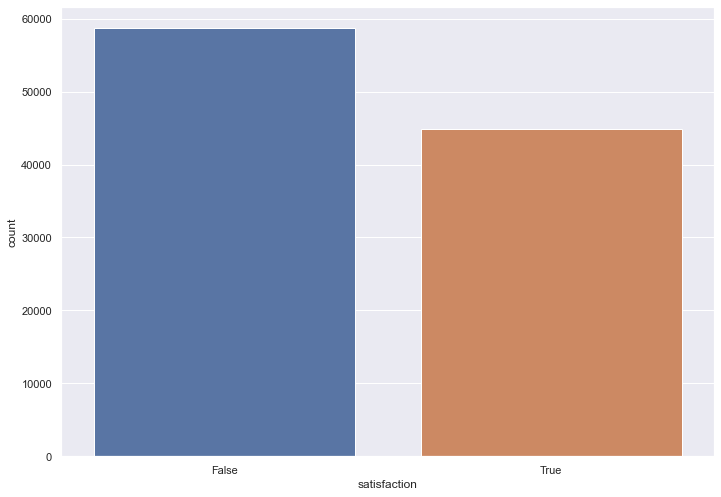

In [70]:
sns.countplot(x = dfAirline_train_v1['satisfaction'])

In [71]:
print(f'In terms of percentage in the trainining set, {round(dfAirline_train_v1["satisfaction"].sum()/dfAirline_train_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the training dataset.')

In terms of percentage in the trainining set, 43.3% are satisfied in the data related to the training dataset.


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

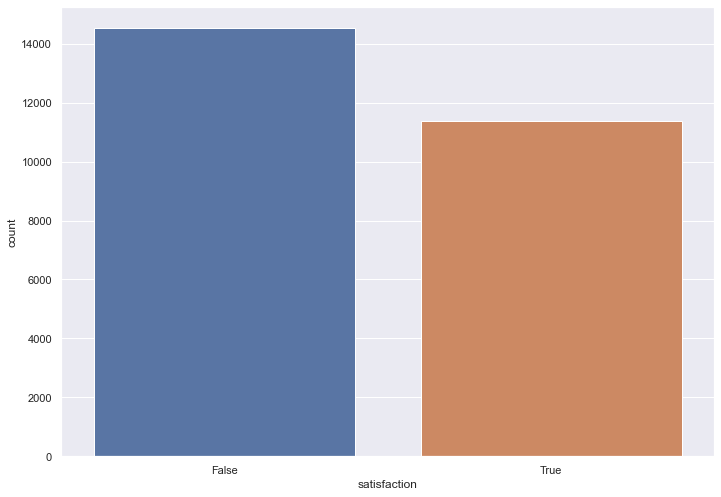

In [72]:
sns.countplot(x = dfAirline_test_v1['satisfaction'])

In [73]:
print(f'In terms of percentage in the test set, {round(dfAirline_test_v1["satisfaction"].sum()/dfAirline_test_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the test dataset.')

In terms of percentage in the test set, 43.9% are satisfied in the data related to the test dataset.


We are dealing with a balanced dataset, so there is no need to solve any balancing issues.

### Boolean Features

Now let's look to the boolean features.

In [74]:
BOOLEAN_FEATURES = ['Gender', 'Customer Type']

**Training dataset**

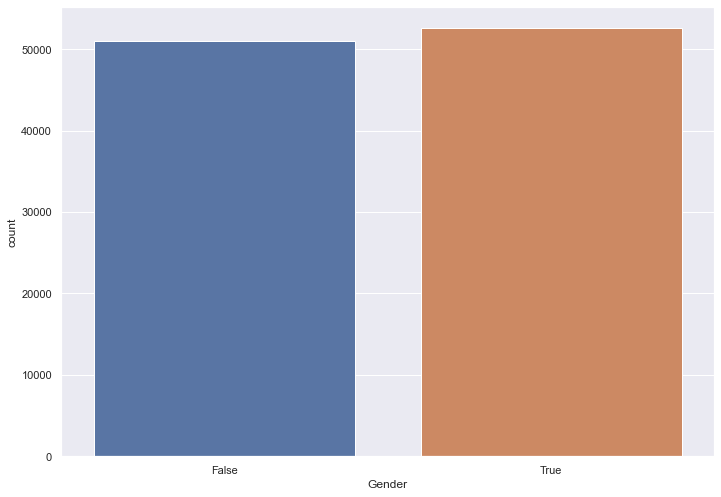

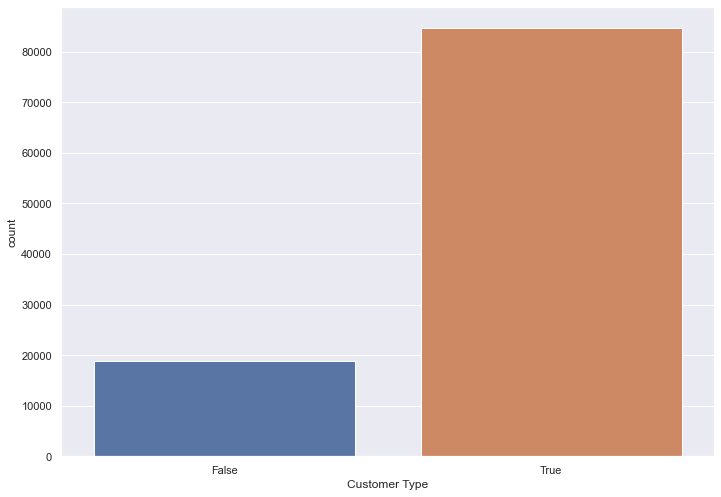

In [75]:
for i in BOOLEAN_FEATURES:
    sns.countplot(x = dfAirline_train_v1[i])
    plt.show()

**Test dataset**

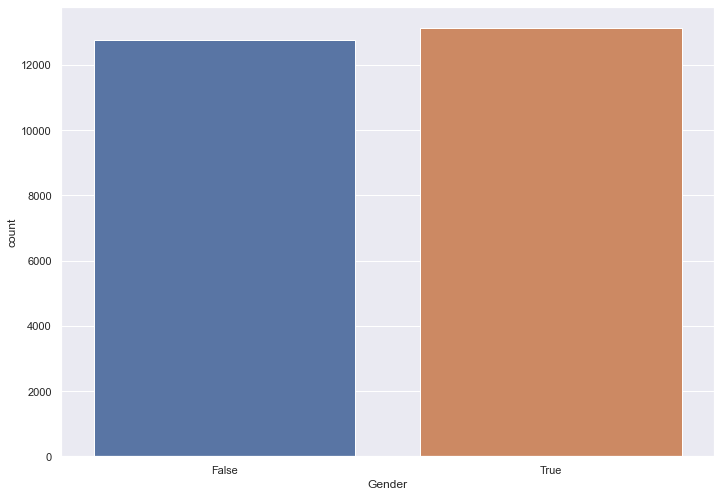

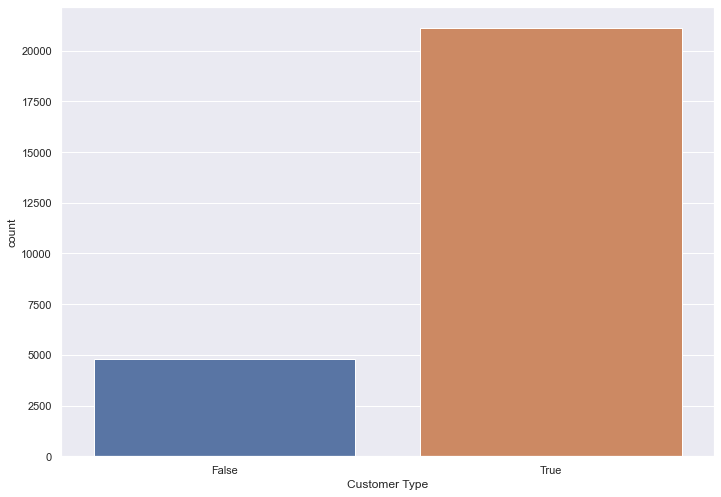

In [76]:
for i in BOOLEAN_FEATURES:
    sns.countplot(x = dfAirline_test_v1[i])
    plt.show()

Regarding features with boolean values, we can see that feature gender have balanced values. In the Customer Type feature, we can verify that most customers are loyal clients.

In [77]:
print(f'In terms of percentage in the training set, {round(dfAirline_train_v1["Customer Type"].sum()/dfAirline_train_v1["Customer Type"].count(),3)*100}% are loyal clients.')

In terms of percentage in the training set, 81.69999999999999% are loyal clients.


In [78]:
print(f'In terms of percentage in the test set, {round(dfAirline_test_v1["Customer Type"].sum()/dfAirline_test_v1["Customer Type"].count(),3)*100}% are loyal clients.')

In terms of percentage in the test set, 81.5% are loyal clients.


### Continuos Features

Now let's look to the continuos features.

In [79]:
CONTINUOUS_FEATURES = dfAirline_train_v1.select_dtypes(include=['float64','int64']).columns

In [80]:
CONTINUOUS_FEATURES = np.delete(CONTINUOUS_FEATURES,0)

In [81]:
CONTINUOUS_FEATURES

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class_Sequential_Added'],
      dtype='object')

**Training set**

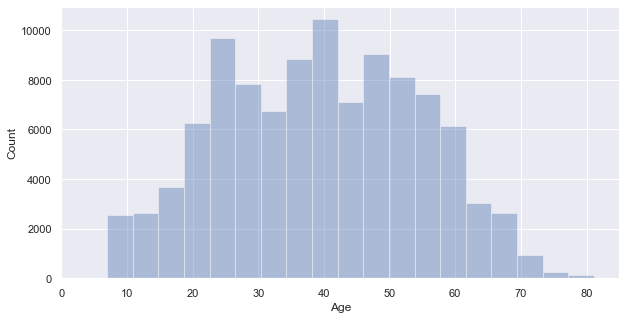

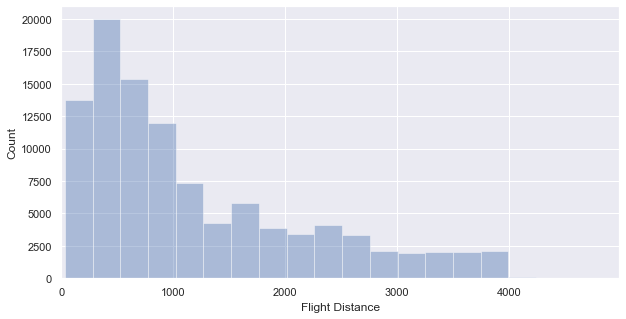

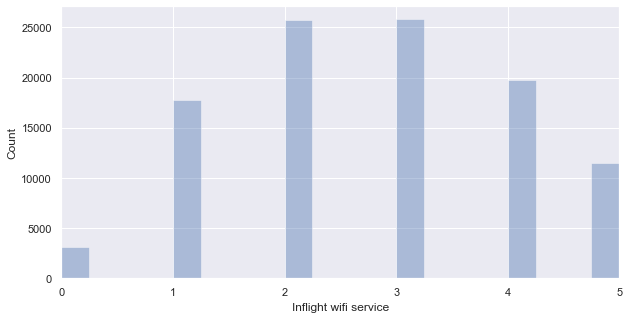

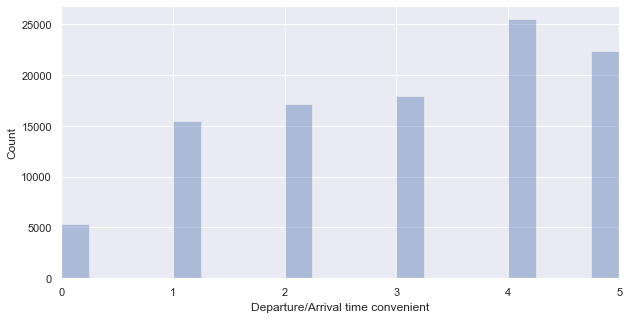

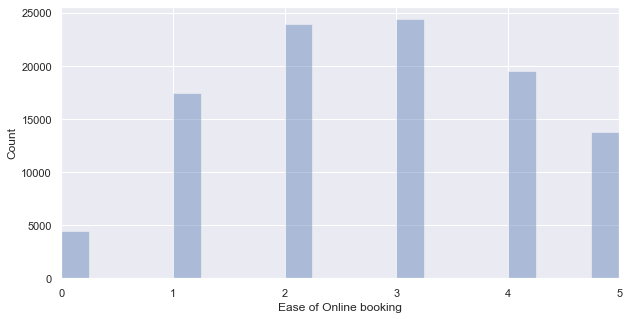

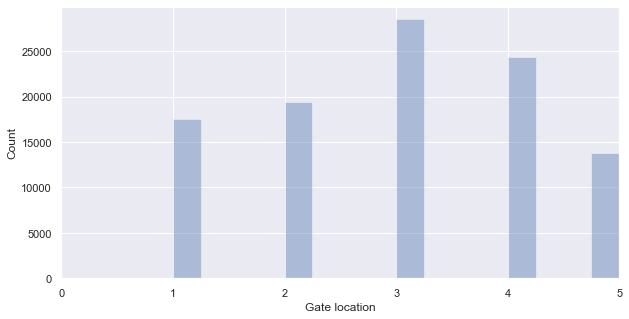

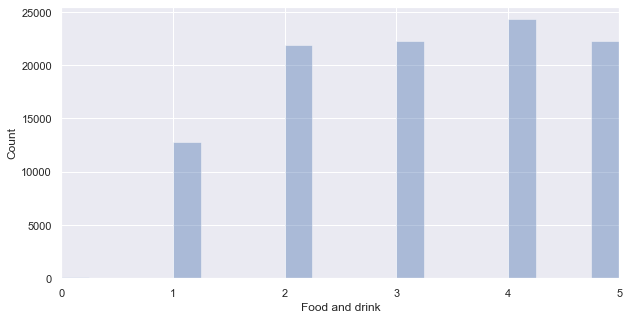

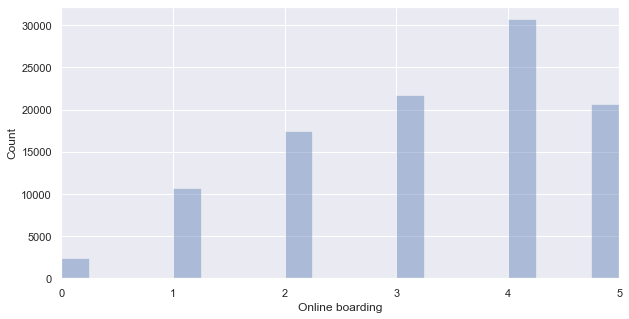

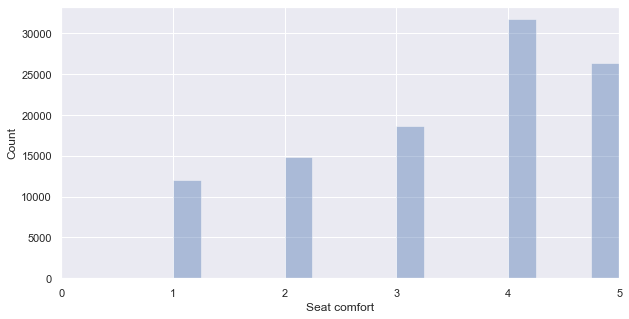

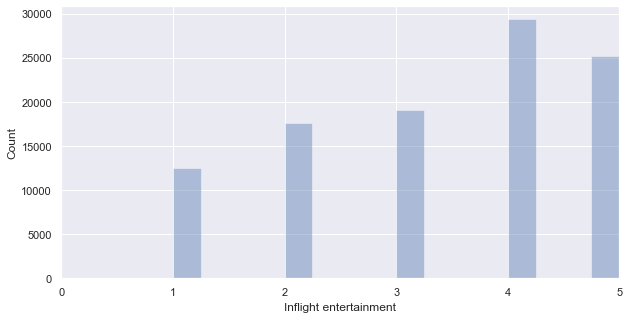

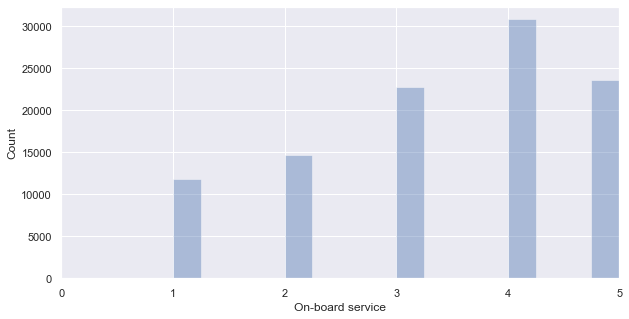

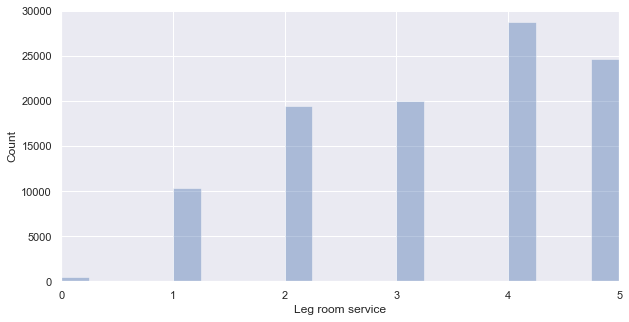

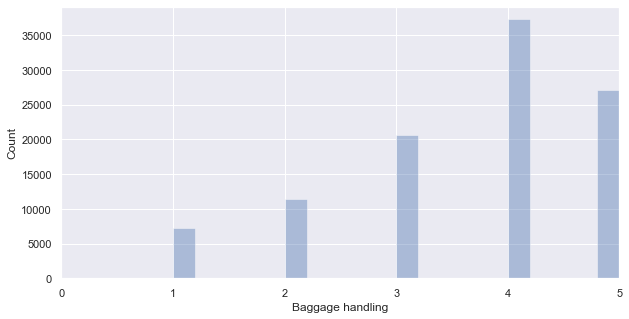

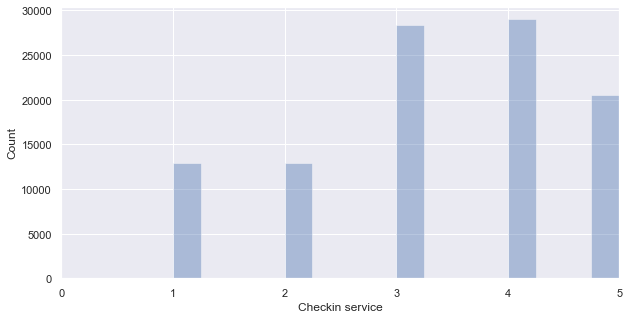

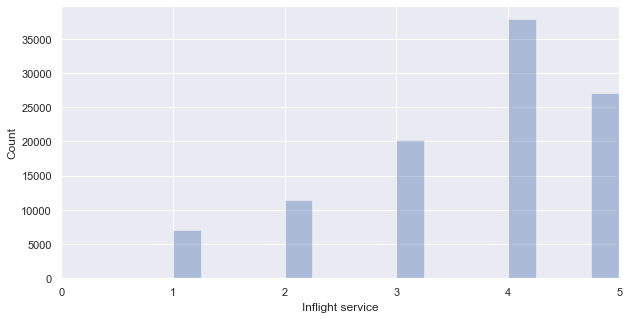

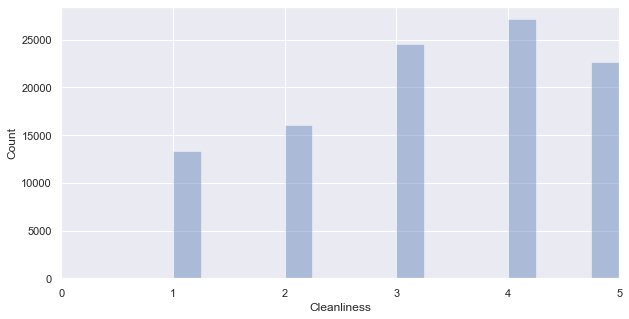

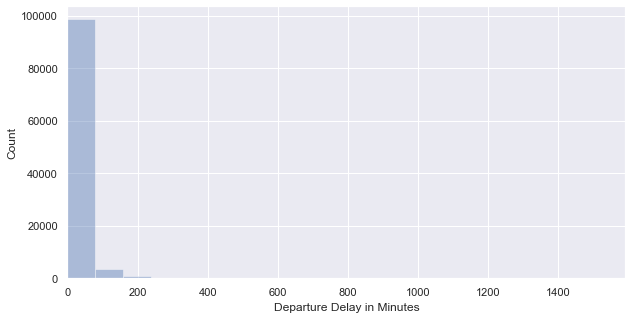

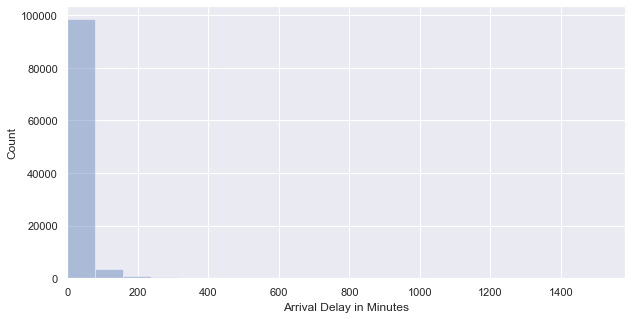

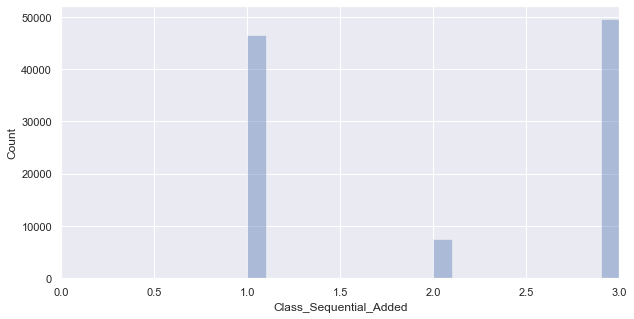

In [82]:
for i in CONTINUOUS_FEATURES:
    plt.figure(figsize=(10,5))
    plt.xlim(0,max(dfAirline_train_v1[i].unique()))
    plt.xlabel(str(i))
    plt.ylabel('Count')
    sns.distplot(dfAirline_train_v1[i],bins=20,kde=False)
    plt.show()

**Test set**

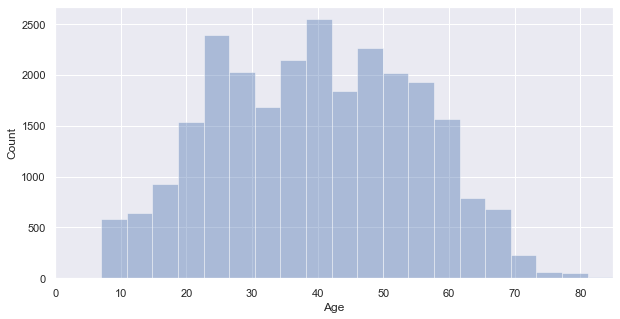

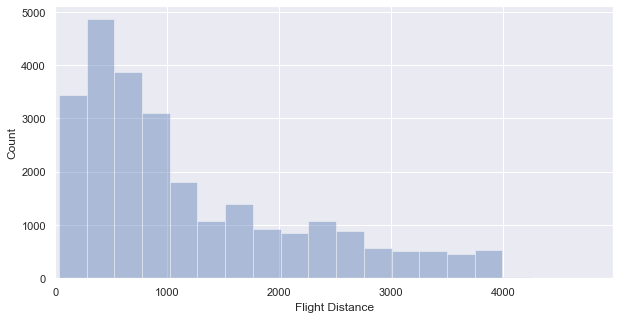

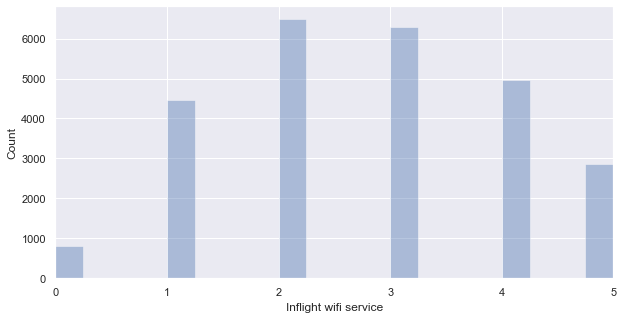

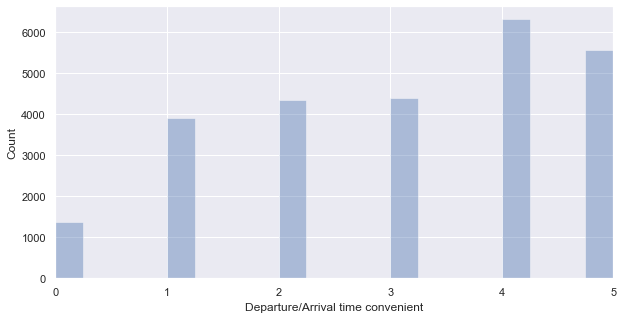

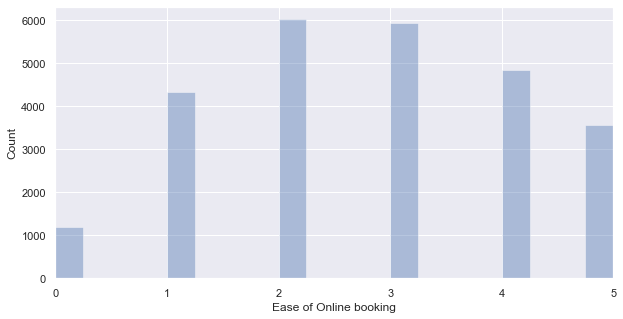

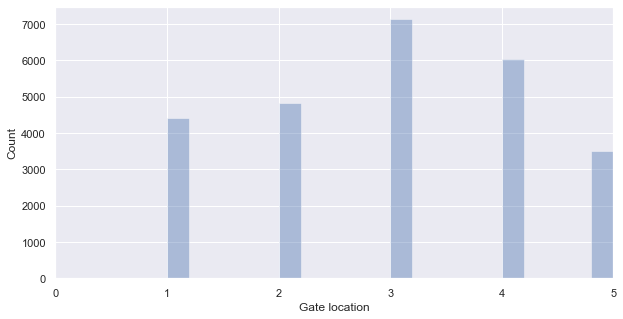

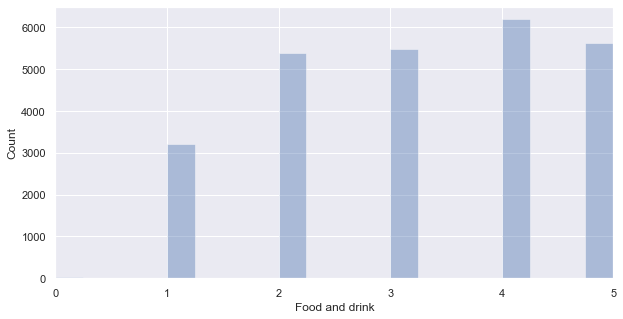

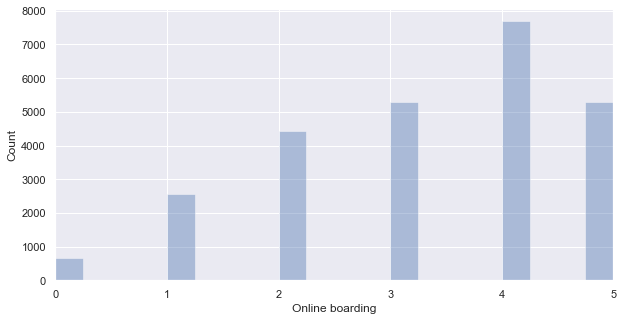

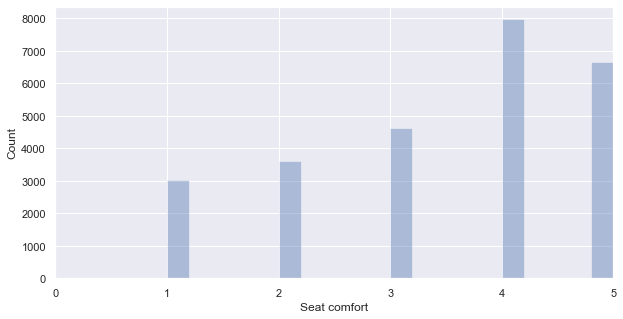

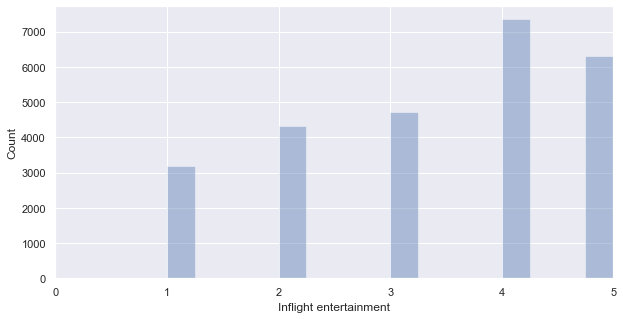

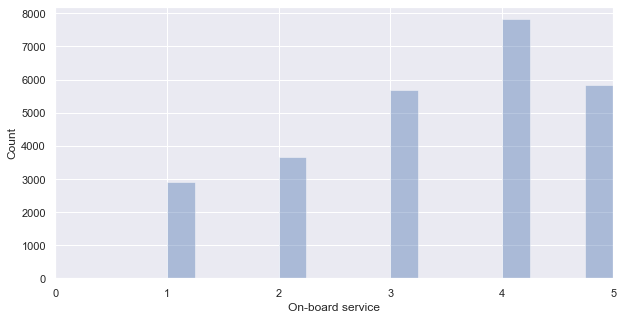

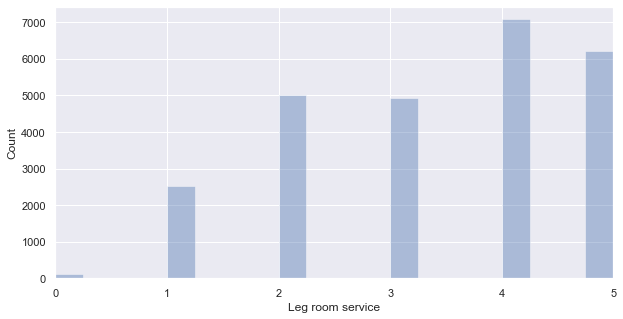

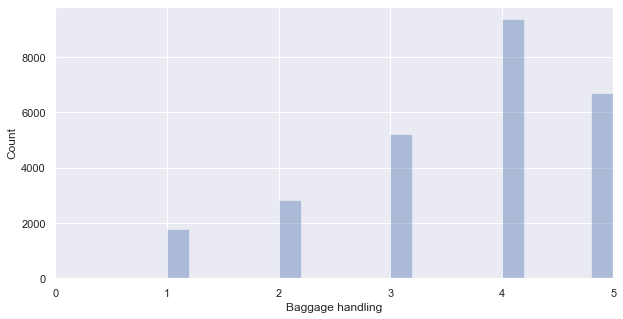

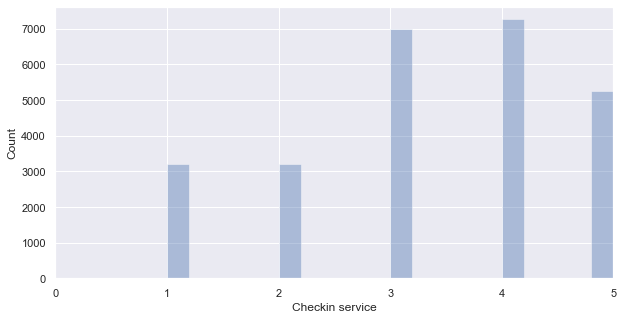

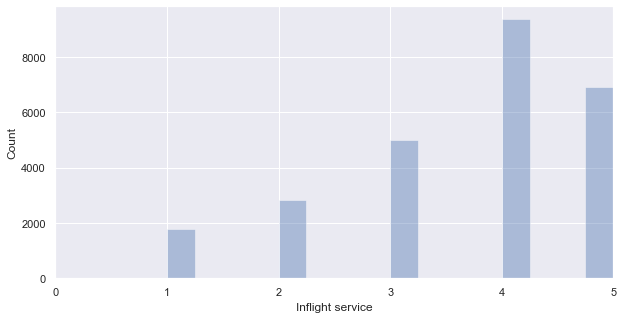

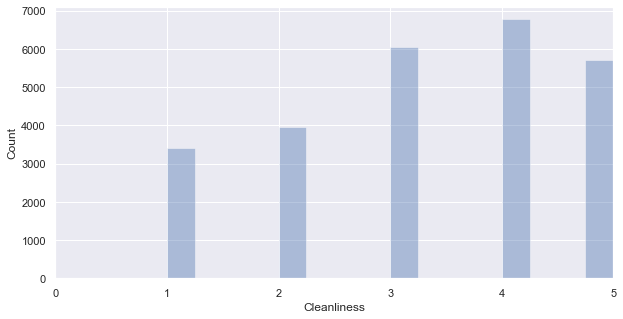

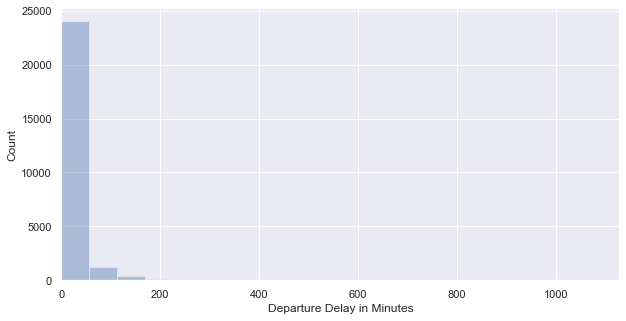

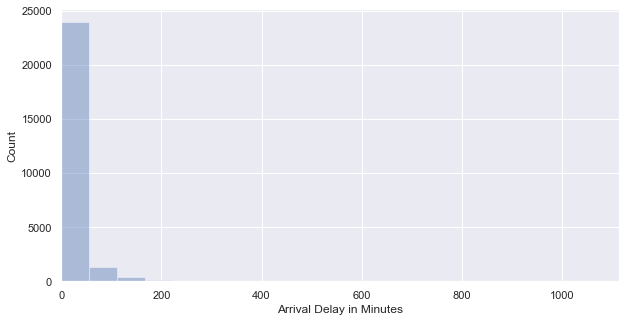

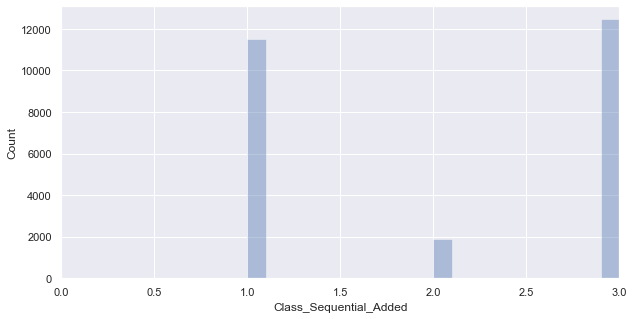

In [83]:
for i in CONTINUOUS_FEATURES:
    plt.figure(figsize=(10,5))
    plt.xlim(0,max(dfAirline_test_v1[i].unique()))
    plt.xlabel(str(i))
    plt.ylabel('Count')
    sns.distplot(dfAirline_test_v1[i],bins=20,kde=False)
    plt.show()

In both datasets, we can see the presence of outliers in the Departure Delay in Minutes and Arrival Delay in Minutes features. We can also see that the Flight Distance feature doesn't follow a normal distribution.

Later, we have to solve this problems.

## Correlations

For this module, I will use pearson's coefficients to obtain correlations and a heatmap to get a better view of the dataset in this regard.

<AxesSubplot:>

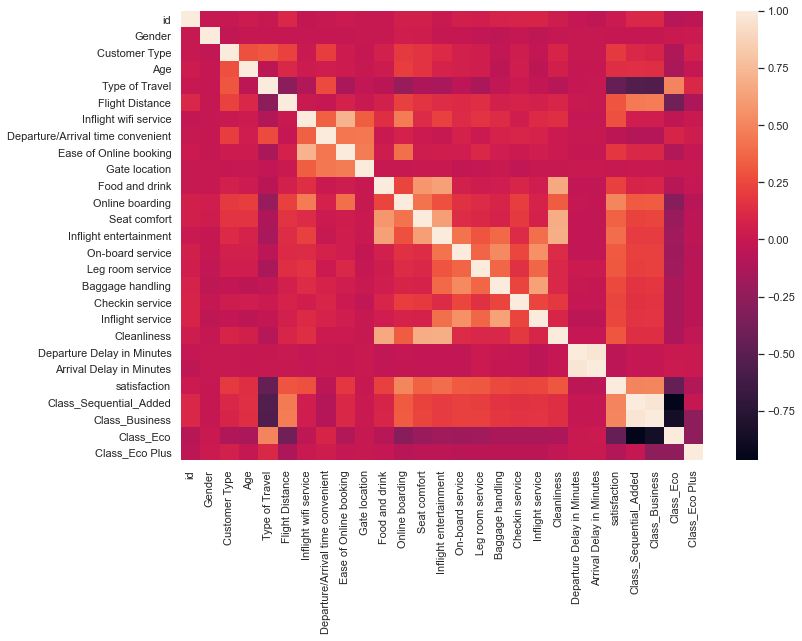

In [84]:
corr = dfAirline_train_v1.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr)

There are some correlations that are obvious, like the correlation of the feature Class_Sequential_Added with the three features related to class information. Despite that, we can check some interesting heat points through this map, namely: 
* `satisfaction` and `Type of Travel` (negative correlation)
* `Flight Distance` and `Type of Travel` (negative correlation)
* `Class` and `Type of Travel` (negative correlation)
* `satisfaction` and `Class_Eco` (negative correlation)

The correlation between the Departure Delay in Minutes and the Arrival Delay in Minutes is also obvious because when a plane leaves with a delay it is very likely to arrive at a destination with a delay too.

## Save Dataset

Before saving the dataset, we must delete the id column, because it will not be necessary to our analysis.

In [85]:
del dfAirline_train_v1['id']
del dfAirline_test_v1['id']

In [88]:
dfAirline_train_v1.dtypes

Gender                                  bool
Customer Type                           bool
Age                                    int64
Type of Travel                          bool
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                            bool
Class_Sequ

In [86]:
dfAirline_train_v1.to_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_train__preprocessed.csv')
dfAirline_test_v1.to_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_test__preprocessed.csv')